# EDA

Importing dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

## Plotting confirmed cases in France vs Italy, China and Singapore

In [2]:
ts_confirmed =pd.read_csv('DATA/time_series_covid_19_confirmed.csv')

In [3]:
ts_confirmed[ts_confirmed['Country/Region'] =='France']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
36,NaN,France,47.0000,2.0000,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209,1784,NaN
350,France,France,46.2276,2.2137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2281.0
392,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
399,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


Construction des series temporels des cas confirmés 

In [4]:
f_confirmed =ts_confirmed[ts_confirmed['Country/Region'] =='France'].sum(axis=0)[2:]
i_confirmed=ts_confirmed[ts_confirmed['Country/Region'] =='Italy'].sum(axis=0)[4:]
c_confirmed=ts_confirmed[ts_confirmed['Country/Region'] =='Mainland China'].sum(axis=0)[4:]
sg_confirmed=ts_confirmed[ts_confirmed['Country/Region'] =='Singapore'].sum(axis=0)[4:]

f_confirmed.index = pd.to_datetime(f_confirmed.index)
i_confirmed.index = pd.to_datetime(i_confirmed.index)
c_confirmed.index = pd.to_datetime(c_confirmed.index)
sg_confirmed.index = pd.to_datetime(sg_confirmed.index)

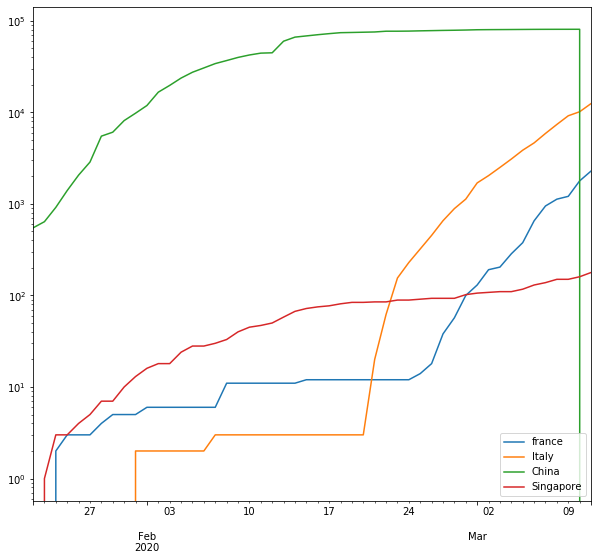

In [5]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

f_confirmed.plot(label='france')
i_confirmed.plot(label='Italy')
c_confirmed.plot(label='China')
sg_confirmed.plot(label='Singapore')

plt.legend(loc='lower right')

## Plotting Rate of change 

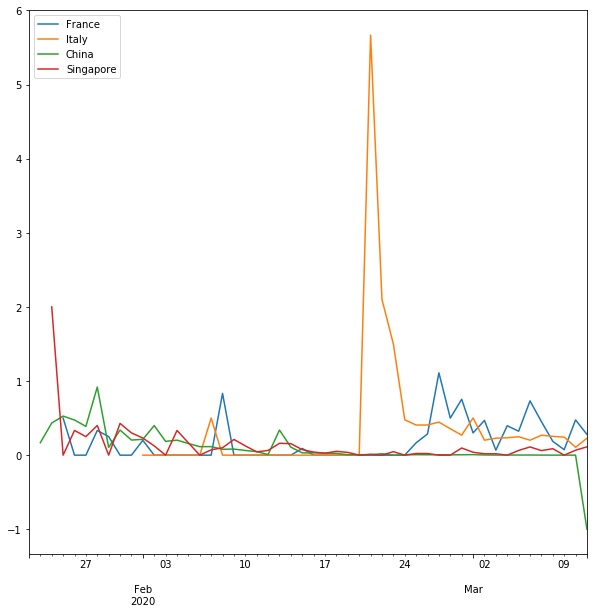

In [6]:
fig = plt.figure(figsize=(10,10))


f_confirmed.pct_change().plot(label='France')
i_confirmed.pct_change().plot(label='Italy')
c_confirmed.pct_change().plot(label='China')
sg_confirmed.pct_change().plot(label='Singapore')
plt.legend(loc='upper left')

Décaler la courbe des cas de france et d'italie

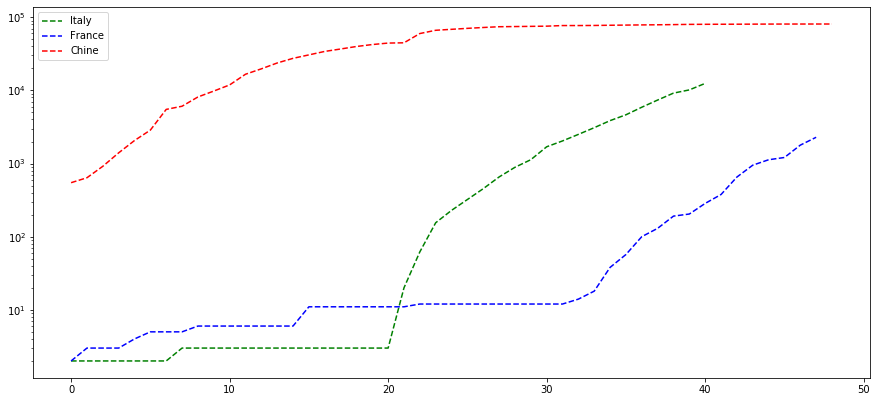

In [7]:
ilist=i_confirmed.where(i_confirmed>0).dropna().tolist()
flist=f_confirmed.where(f_confirmed>0).dropna().tolist()
Clist=c_confirmed.where(c_confirmed>0).dropna().tolist()


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')
ax.plot(ilist, 'g--',label='Italy')
ax.plot(flist,'b--',label='France')
ax.plot(Clist,'r--',label='Chine')
plt.legend(loc='upper left')

## Remarques

En décalant les deux courbes pour avoir le même début, nous remarquons que les courbes ont la même forme exponentiel, la France a pu retarder l'évolution des cas de COVID19 un peu plus longtemps de l'Italie mais la progression du virus est visuellement la même;

**Comme annoncé par le président de la république Macron, l'épidémie en France ne fait que commencer.**

# Linear Regression

On construit la matrice X qui représente les **w intervals** depuis le début de notre série temporelle à la fin de la série temporelle.

Cette matrice historise les valeurs de la série tempoerelle et est utilisé pour prédire les prochaines valeurs de la série $ỹ$ :
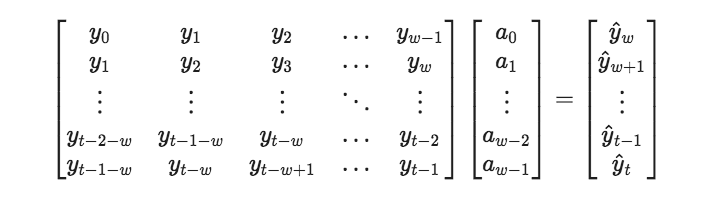


In [8]:
start = 10
middle = len(i_confirmed)-10
end = len(i_confirmed)-1

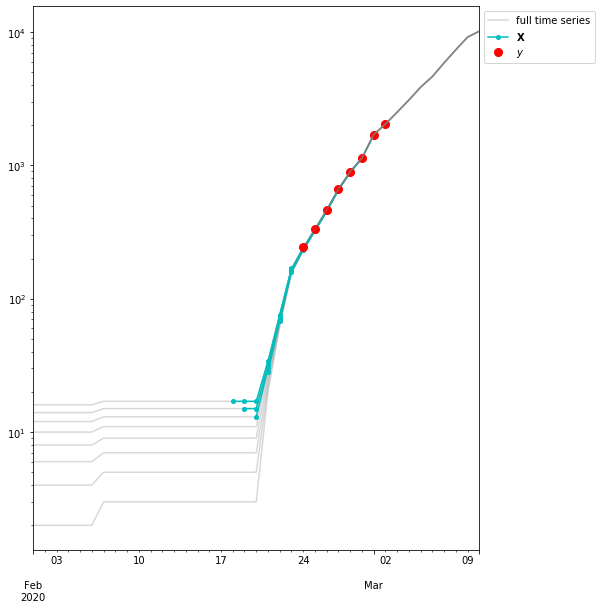

In [9]:
fig, ax = plt.subplots(figsize=(8,10))

window = 6

for i in range(8):

    full = i_confirmed[start:end]
    train = i_confirmed[middle - i - window : middle - i]
    predict = i_confirmed[middle - i : middle - i + 1]

    (full + 2 * i).plot(ax=ax, c="grey", alpha=0.3)
    (train + 2 * i).plot(ax=ax, c="c", markersize=4, marker="o")
    (predict + 2 * i).plot(ax=ax, c="r", markersize=8, marker="o", linestyle="")


ax.get_yaxis().set_ticks([])
ax.set_yscale('log')

ax.legend(["full time series", "$\mathbf{X}$", "$y$"], bbox_to_anchor=(1, 1))

In [10]:
window = 5
num_samples = 10
X_mat = []
y_mat = []
for i in range(num_samples):
    # Slice a window of features
    X_mat.append(i_confirmed[middle - i - window : middle - i].values)
    y_mat.append(i_confirmed[middle - i:middle - i + 1].values)

X_mat = np.vstack(X_mat)
y_mat = np.concatenate(y_mat)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression(fit_intercept=False)
lr = lr.fit(X_mat, y_mat)

In [12]:
y_pred = lr.predict(X_mat)

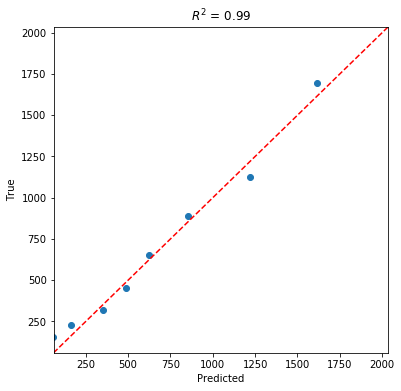

In [13]:
fig, ax = plt.subplots(figsize=(6, 6));

ax.scatter(y_pred, y_mat);

one_to_one = np.arange(y_mat.min()-2, y_mat.max()+2)
ax.plot(one_to_one, one_to_one, c='r', linestyle='--');

ax.set_xlim((one_to_one[0], one_to_one[-1]));
ax.set_ylim((one_to_one[0], one_to_one[-1]));
ax.set_xlabel('Predicted');
ax.set_ylabel('True');
ax.set_title(f'$R^{2}$ = {r2_score(y_mat, y_pred):3.2f}');

# Using LSTM

In [98]:
import math
from datetime import timedelta  
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

## Preparing the data

In [15]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.asarray(X), np.asarray(y)

In [104]:
# define input sequence
# choose a number of time steps ( equivalent to # of features)
n_steps = 10 

X, y = split_sequence(f_confirmed, n_steps)

## LSTM Model

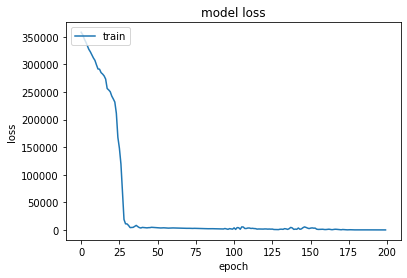

In [116]:
n_features = 1

X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
history = model.fit(X, y, epochs=200,verbose=0)

# history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

Prédire l'évoltion des cas de COVID19 en France sur le prochains 30 jours

In [130]:
n=15
index30 = pd.date_range(f_confirmed.index[-1]+timedelta(days=1), periods=n, freq='D')
last_cases = f_confirmed[-n_steps:].values
prediction30 = []
for i in range(n):
    x_input = last_cases[-n_steps:]
    x_input = x_input.reshape((1, n_steps, n_features))
    y_pred = model.predict(x_input)
    prediction30.append(int(y_pred[0][0]))
    last_cases=np.append(last_cases,int(y_pred[0][0]))
serie30= pd.Series(data=prediction30,index=index30)

In [131]:
serie30

2020-03-12      3043
2020-03-13      4374
2020-03-14      5270
2020-03-15      7443
2020-03-16     12108
2020-03-17     13105
2020-03-18     20172
2020-03-19     23844
2020-03-20     30806
2020-03-21     39707
2020-03-22     55071
2020-03-23     69368
2020-03-24    115244
2020-03-25    128206
2020-03-26    201106
Freq: D, dtype: int64

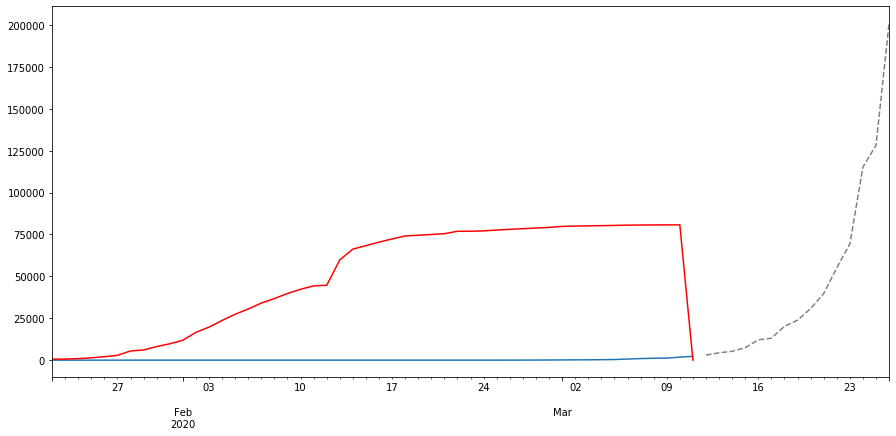

In [132]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1)

#ax.set_yscale('log')

f_confirmed.plot(ax=ax,label='france')
c_confirmed.plot(ax=ax,c='red',label='China')

serie30.plot(ax=ax,c="grey",linestyle='--',label='predition for 30 days')


### Note : To do demain

kan nferge3 had lblane

* Utilser un scaler 
* Scale chinese data 
* Scale french data and predict avec LSTM trained on chinese


Li na9ess :

* chi EDA tkoun mezyana 
* nkteb 3la l'exponentiel kifach kat tkhdem  et la fonction logistique
* nchouf chnou darou nass 3la l'Italie